In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_dir='gdrive/MyDrive/mnist/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(8, 8), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

(train_images_org, train_labels_org), (test_images_org, test_labels_org) = mnist.load_data()

a = 10000
b = 1000

train_images = train_images_org[0:a]
train_labels = train_labels_org[0:a]
test_images = test_images_org[0:b]
test_labels = test_labels_org[0:b]

train_images = train_images.reshape((10000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((1000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))

save_dir = os.path.join(root_dir, 'mnist_conv_net.h5')
model.save(save_dir)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc*100)


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 5, 5, 64)          131136    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)             

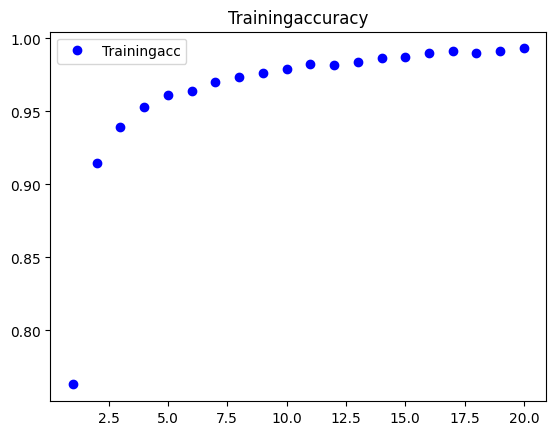

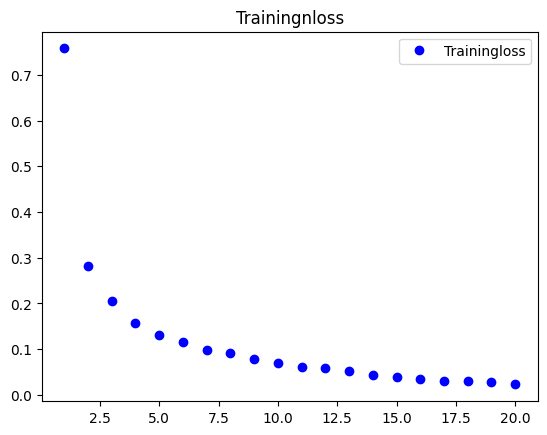

In [ ]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Trainingacc')
plt.title('Trainingaccuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Trainingloss')
plt.title('Trainingnloss')
plt.legend()
plt.show()